<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/19_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰

-------



$$
y = w _ { 0 } x _ { 0 } + w _ { 1 } x _ { 1 } + \cdots + w _ { m } x _ { m } = \sum _ { k = 0 } ^ { m } w _ { k } x _ { k }
$$



目的変数yを説明変数xで表すことを線形回帰と呼ぶ。ただし$$x_0 = 1$$とする。また、$$m=1$$の時を単回帰。$$m\geq2$$の時を重回帰と呼ぶ。

## 単回帰

$$
y = w _ { 0 } x _ { 0 } + w _ { 1 } x _ { 1 } = w _ { 0 } + w _ { 1 } x _ { 1 }
$$

観測点を最も適切に表現する直線を求める

## 重回帰

$$
v = w _ { n } x _ { n } + w _ { 1 } x _ { 1 } + w _ { n } x _ { n } = w _ { 0 } + w _ { 1 } x _ { 1 } + w _ { 2 } x _ { 2 }
$$

観測点を最も適切に表現する平面を求める

##重みの更新

### 最小二乗法
みんな大好き最小二乗法

$$
L ( \boldsymbol { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) ^ { 2 }
$$

Lが目的関数である。

### 勾配降下法
コスト関数Eを
$$
E ( \boldsymbol { w } ) = L ( \boldsymbol { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) ^ { 2 }
$$
として

$$
\begin{aligned} \frac { \partial } { \partial w _ { j } } E ( \boldsymbol { w } ) & = \frac { 1 } { 2 } \sum _ { i } ^ { n } 2 \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) \frac { \partial } { \partial w _ { j } } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) \\ & = \sum _ { i } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) \frac { \partial } { \partial w _ { j } } \left( y ^ { ( i ) } - \sum _ { k } w _ { k } x _ { k } ^ { ( i ) } \right) \\ & = \sum _ { i } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) \left( - x _ { j } ^ { ( i ) } \right) \\ & = - \sum _ { i } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) x _ { j } ^ { ( i ) } \end{aligned}
$$
によって勾配を求める。

したがって、重みの更新式は
$$
w _ { j } \leftarrow w _ { j } + \eta \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) x _ { j } ^ { ( i ) }
$$
となる。ηは学習率である。

## 決定係数
回帰タスクの評価指標である決定係数は残差平方和と総平方和の２つから求める。

### 残差平方和
RSSという
$$
\mathrm { RSS } = \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) ^ { 2 }
$$
によって定義される。最小事情の目的関数Lを二倍したものである。

### 総平方和
正解値の平均をyバーとして
$$
\overline { y } = \frac { 1 } { n } \sum _ { i = 1 } ^ { n } y ^ { ( i ) }
$$
総平方和TSS
$$
\mathrm { TSS } = \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \overline { y } \right) ^ { 2 }
$$
である。

### 決定係数
決定係数 (coefficient of determination) は残差平方和 (RSS) と総平方和 (TSS) を用いて、
$$
R ^ { 2 } = 1 - \frac { \mathrm { RRS } } { \mathrm { TSS } }
$$
と定義される。誤差(RSS)が0のとき1となり1に近いほど性能の良いモデルであると評価できる。

RSS、残差平方和の平均を平均二乗誤差 (mean squared error, MSE) と呼ぶこともでき、
$$
\mathrm { MSE } = \frac { 1 } { n } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) ^ { 2 }
$$
として表される。
平均二乗誤差を利用すると、 R二条は
$$
\begin{aligned} R ^ { 2 } & = 1 - \frac { \mathrm { RRS } } { \mathrm { TSS } } \\ & = 1 - \frac { \frac { 1 } { n } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \hat { y } ^ { ( i ) } \right) ^ { 2 } } { \frac { 1 } { n } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \overline { y } \right) ^ { 2 } } \\ & = 1 - \frac { \mathrm { MSE } } { \operatorname { Var } ( y ) } \end{aligned}
$$
と変形できます。ここでVar(y)は正解地の分散であり、
$$
\begin{aligned} \operatorname { Var } ( y ) & = \frac { 1 } { n } \sum _ { i = 1 } ^ { n } \left( y ^ { ( i ) } - \overline { y } \right) ^ { 2 } \\ & = \frac { 1 } { n } \mathrm { TSS } \end{aligned}
$$
として定義される。


-----

## 実験

### データの読み込み

In [0]:
import numpy
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [0]:
boston = load_boston()
X = boston.data  # 特徴量
y = boston.target  # 目的変数
feature_names = boston.feature_names  # 特徴量名

df = DataFrame(data=X, columns=feature_names)
df['MEDV'] = y  # 目的変数

In [0]:
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
X_train0 = X_train[:, 0].reshape(-1, 1)  # 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)  # 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)  # テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)  # テストデータのLSTAT

In [24]:
# reshape なし
print(X_train[:10, 0])

[6.43  6.176 5.682 5.935 5.926 6.398 6.998 5.683 6.153 5.741]


In [25]:
# reshape あり
print(X_train[:10, 0].reshape(-1, 1))

[[6.43 ]
 [6.176]
 [5.682]
 [5.935]
 [5.926]
 [6.398]
 [6.998]
 [5.683]
 [6.153]
 [5.741]]


In [26]:
print(X_train[:10])

[[ 6.43   5.21 ]
 [ 6.176 12.04 ]
 [ 5.682 10.21 ]
 [ 5.935  6.58 ]
 [ 5.926 18.13 ]
 [ 6.398  7.79 ]
 [ 6.998  2.94 ]
 [ 5.683 22.98 ]
 [ 6.153 13.15 ]
 [ 5.741 13.15 ]]


### 前処理

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [0]:
standerd_scaler = StandardScaler()
X_train_scaled0 = standerd_scaler.fit_transform(X_train0)  # 訓練データのスケーリング
X_test_scaled0 = standerd_scaler.transform(X_test0)  # テストデータのスケーリング

In [0]:
min_max_scaler = MinMaxScaler()
X_train_scaled1 = min_max_scaler.fit_transform(X_train1)  # 訓練データのスケーリング
X_test_scaled1 = min_max_scaler.transform(X_test1)  # テストデータのスケーリング

In [30]:
# X_train と同じ形状の配列を作る
X_train_scaled = numpy.zeros(X_train.shape)
# 1列目にスケール済みの RM を代入する
X_train_scaled[:, 0] = X_train_scaled0.reshape(-1)
# 2列目にスケール済みの LSTAT を代入する
X_train_scaled[:, 1] = X_train_scaled1.reshape(-1)
# 最初の10行を表示する
print(X_train_scaled[:10])

[[ 0.14526384  0.09602649]
 [-0.20840082  0.28449227]
 [-0.89623682  0.23399558]
 [-0.54396454  0.13383002]
 [-0.55649596  0.45253863]
 [ 0.10070766  0.16721854]
 [ 0.936136    0.03338852]
 [-0.89484444  0.58636865]
 [-0.24042558  0.31512141]
 [-0.81408637  0.31512141]]


In [31]:
# X_test と同じ形状の配列を作る
X_test_scaled = numpy.zeros(X_test.shape)
# 1列目にスケール済みの RM を代入する
X_test_scaled[:, 0] = X_test_scaled0.reshape(-1)
# 2列目にスケール済みの LSTAT を代入する
X_test_scaled[:, 1] = X_test_scaled1.reshape(-1)
# 最初の10行を表示する
print(X_test_scaled[:10])

[[ 0.12577051  0.20171082]
 [ 0.60196466  0.04966887]
 [-0.47713027  0.450883  ]
 [-0.36295507  0.10458057]
 [-0.03992278  0.42880795]
 [-0.06498563  0.28256071]
 [-0.57320453  0.4580574 ]
 [-0.21118559  0.61892936]
 [-0.13460465  0.30739514]
 [-0.41586553  0.34768212]]


### 単回帰

In [0]:
from sklearn.linear_model import SGDRegressor

In [0]:
reg0 = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)

In [34]:
reg0.fit(X_train_scaled0, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [35]:
reg0.score(X_train_scaled0, y_train)

0.48788214501838045

In [36]:
reg0.score(X_test_scaled0, y_test)

0.4582922711258371

In [0]:
from matplotlib import pyplot

In [0]:
y_pred = reg0.predict(X_test_scaled0)

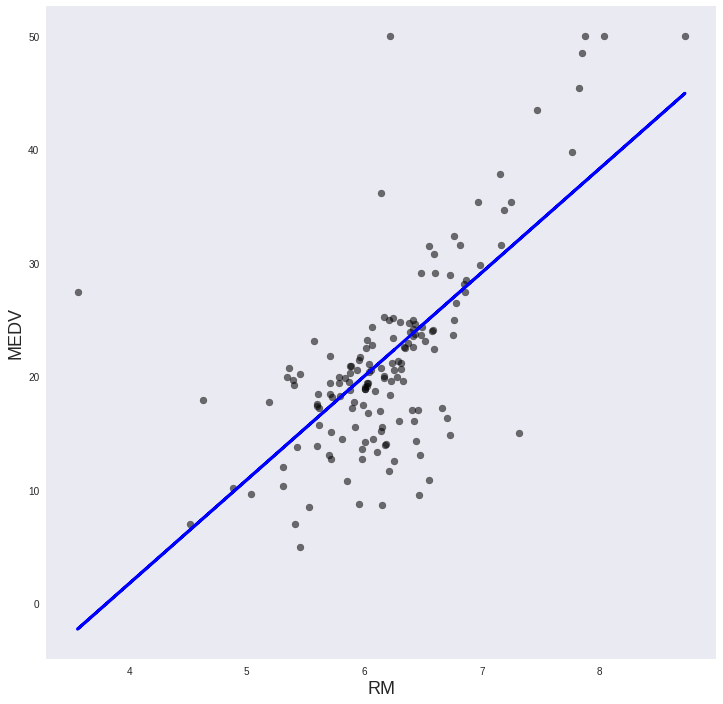

In [39]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test0, y_test, color='black', alpha=0.55)

# 予測値のプロット（直線）
pyplot.plot(X_test0, y_pred, linewidth=3, color='blue')

pyplot.xlabel("RM", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)

pyplot.grid()
pyplot.show()

In [0]:
reg1 = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)

In [41]:
reg1.fit(X_train_scaled1, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [42]:
reg1.score(X_train_scaled1, y_train)

0.5568885061492568

In [43]:
reg1.score(X_test_scaled1, y_test)

0.49510611450093317

In [0]:
# テストデータの予測値
y_pred = reg1.predict(X_test_scaled1)

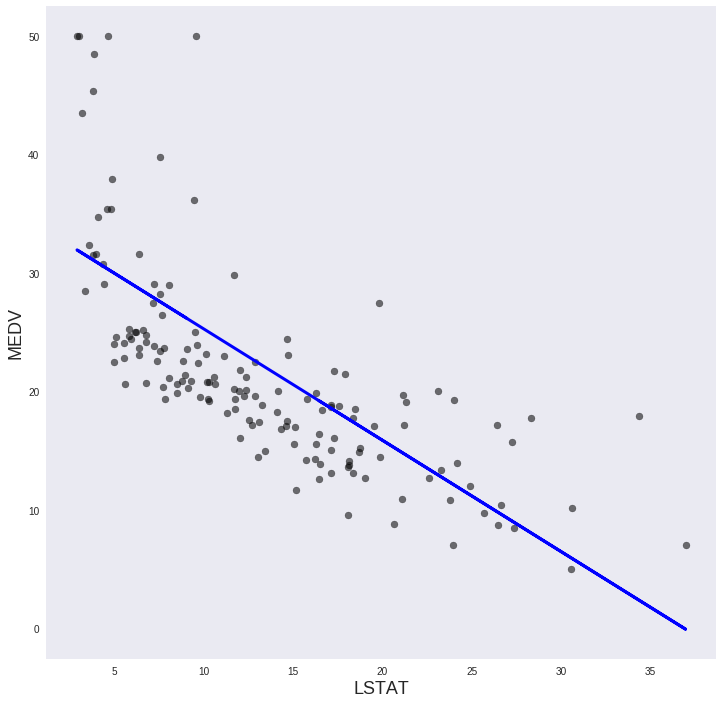

In [45]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)

# 予測値のプロット（直線）
pyplot.plot(X_test1, y_pred, linewidth=3, color='blue')

pyplot.xlabel("LSTAT", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)

pyplot.grid()
pyplot.show()

### 重回帰

In [0]:
reg = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)

In [47]:
reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [48]:
reg.score(X_train_scaled, y_train)

0.6465520140289235

In [49]:
reg.score(X_test_scaled, y_test)

0.6042122051466812